# **Extracción del Archivo Tratado**

In [54]:
import pandas as pd

In [55]:
datos = pd.read_csv("/content/Datos_tratados.csv")
datos

,customerid,churn,gender,phoneservice,multiplelines,internetservice,contract,paymentmethod,charges_monthly,charges_total,cuentas_diarias,churn_binario
0,0002-ORFBO,no,Female,Yes,No,DSL,One year,Mailed check,65.60,593.30,2.186667,0.0
1,0003-MKNFE,no,Male,Yes,Yes,DSL,Month to month,Mailed check,59.90,542.40,1.996667,0.0
2,0004-TLHLJ,yes,Male,Yes,No,Fiber optic,Month to month,Electronic check,73.90,280.85,2.463333,1.0
3,0011-IGKFF,yes,Male,Yes,No,Fiber optic,Month to month,Electronic check,98.00,1237.85,3.266667,1.0
4,0013-EXCHZ,yes,Female,Yes,No,Fiber optic,Month to month,Mailed check,83.90,267.40,2.796667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,no,Female,Yes,No,DSL,One year,Mailed check,55.15,742.90,1.838333,0.0
7039,9992-RRAMN,yes,Male,Yes,Yes,Fiber optic,Month to month,Electronic check,85.10,1873.70,2.836667,1.0
7040,9992-UJOEL,no,Male,Yes,No,DSL,Month to month,Mailed check,50.30,92.75,1.676667,0.0
7041,9993-LHIEB,no,Male,Yes,No,DSL,Two year,Mailed check,67.85,4627.65,2.261667,0.0


In [56]:
datos.describe()

,charges_monthly,charges_total,cuentas_diarias,churn_binario
count,7043.000000,7032.000000,7043.000000,7043.000000
mean,64.761692,2283.300441,2.158723,0.265370
std,30.090047,2266.771362,1.003002,0.441561
min,18.250000,18.800000,0.608333,0.000000
25%,35.500000,401.450000,1.183333,0.000000
50%,70.350000,1397.475000,2.345000,0.000000
75%,89.850000,3794.737500,2.995000,1.000000
max,118.750000,8684.800000,3.958333,1.000000


In [57]:
datos.describe(include=['object'])

,customerid,churn,gender,phoneservice,multiplelines,internetservice,contract,paymentmethod
count,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,3,3,3,4
top,9995-HOTOH,no,Male,Yes,No,Fiber optic,Month to month,Electronic check
freq,1,5174,3555,6361,3390,3096,3875,2365


In [58]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       7043 non-null   object 
 1   churn            7043 non-null   object 
 2   gender           7043 non-null   object 
 3   phoneservice     7043 non-null   object 
 4   multiplelines    7043 non-null   object 
 5   internetservice  7043 non-null   object 
 6   contract         7043 non-null   object 
 7   paymentmethod    7043 non-null   object 
 8   charges_monthly  7043 non-null   float64
 9   charges_total    7032 non-null   float64
 10  cuentas_diarias  7043 non-null   float64
 11  churn_binario    7043 non-null   float64
dtypes: float64(4), object(8)
memory usage: 660.4+ KB


# **Eliminación de Columnas Irrelevantes**

In [59]:
datos = datos.drop(['customerid','churn_binario'], axis=1)
datos

,churn,gender,phoneservice,multiplelines,internetservice,contract,paymentmethod,charges_monthly,charges_total,cuentas_diarias
0,no,Female,Yes,No,DSL,One year,Mailed check,65.60,593.30,2.186667
1,no,Male,Yes,Yes,DSL,Month to month,Mailed check,59.90,542.40,1.996667
2,yes,Male,Yes,No,Fiber optic,Month to month,Electronic check,73.90,280.85,2.463333
3,yes,Male,Yes,No,Fiber optic,Month to month,Electronic check,98.00,1237.85,3.266667
4,yes,Female,Yes,No,Fiber optic,Month to month,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...
7038,no,Female,Yes,No,DSL,One year,Mailed check,55.15,742.90,1.838333
7039,yes,Male,Yes,Yes,Fiber optic,Month to month,Electronic check,85.10,1873.70,2.836667
7040,no,Male,Yes,No,DSL,Month to month,Mailed check,50.30,92.75,1.676667
7041,no,Male,Yes,No,DSL,Two year,Mailed check,67.85,4627.65,2.261667


In [60]:
print(datos['charges_total'].isnull().sum())

11


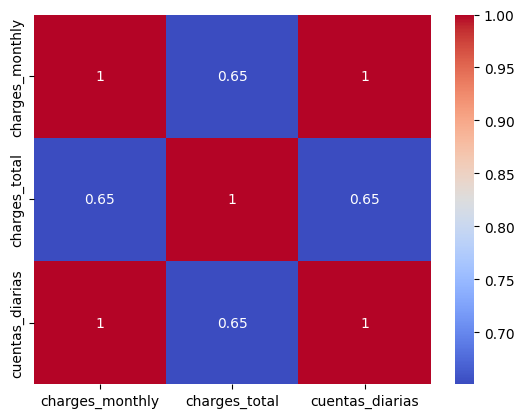

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(datos.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

# **Encoding**

In [62]:
datos_original = datos.copy()

In [63]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [64]:
categoricas = ['gender', 'phoneservice','multiplelines', 'internetservice', 'contract']

one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),
    categoricas),
    remainder='passthrough'
)

datos_transformed = one_hot_enc.fit_transform(datos)

# **Verificación de la Proporción de Cancelación (Churn)**

In [65]:
datos.rename(columns={'remainder__churn': 'churn'}, inplace=True)

In [66]:
datos['churn'].value_counts().index

Index(['no', 'yes'], dtype='object', name='churn')

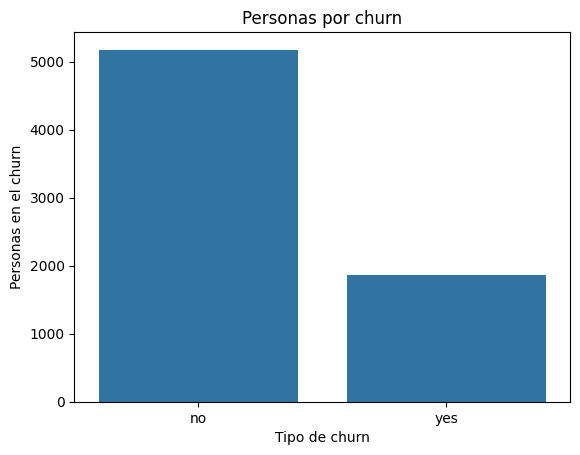

In [67]:
order = datos['churn'].value_counts().index
sns.countplot(data=datos, x='churn', order=order)
plt.title('Personas por churn')
plt.xlabel('Tipo de churn')
plt.ylabel('Personas en el churn')
plt.show()

In [68]:
conteo = datos['churn'].value_counts()

proporcion = datos['churn'].value_counts(normalize=True)

print(f"Conteo:\n {conteo}")
print(f"\nProporciones:\n f{proporcion}")

Conteo:
 churn
no     5174
yes    1869
Name: count, dtype: int64

Proporciones:
 fchurn
no     0.73463
yes    0.26537
Name: proportion, dtype: float64


# **Balanceo de Clases**

In [69]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   churn            7043 non-null   object 
 1   gender           7043 non-null   object 
 2   phoneservice     7043 non-null   object 
 3   multiplelines    7043 non-null   object 
 4   internetservice  7043 non-null   object 
 5   contract         7043 non-null   object 
 6   paymentmethod    7043 non-null   object 
 7   charges_monthly  7043 non-null   float64
 8   charges_total    7032 non-null   float64
 9   cuentas_diarias  7043 non-null   float64
dtypes: float64(3), object(7)
memory usage: 550.4+ KB


In [70]:
from imblearn.under_sampling import RandomUnderSampler

X = datos.drop('churn', axis=1)
y = datos['churn']


rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X,y)

In [71]:
ros = RandomUnderSampler(random_state=42)
X_res, y_res = ros.fit_resample(X,y)

In [72]:
X['charges_total'] = pd.to_numeric(X['charges_total'], errors='coerce')
X['charges_total'].fillna(X['charges_total'].median(), inplace=True)

/tmp/ipython-input-72-2166033501.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['charges_total'].fillna(X['charges_total'].median(), inplace=True)


In [73]:
X.select_dtypes(include='object').columns

Index(['gender', 'phoneservice', 'multiplelines', 'internetservice',
       'contract', 'paymentmethod'],
      dtype='object')

In [74]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [75]:
from imblearn.over_sampling import SMOTE

# Convert all object type columns to numeric, coercing errors and filling NaN
for col in X.select_dtypes(include='object').columns:
  X[col] = pd.to_numeric(X[col], errors='coerce').fillna(0)

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X,y)

# **Normalización o Estandarización**

In [76]:
X_res.select_dtypes(include=['float64', 'int64']).columns

Index(['gender', 'phoneservice', 'multiplelines', 'internetservice',
       'contract', 'paymentmethod', 'charges_monthly', 'charges_total',
       'cuentas_diarias'],
      dtype='object')

In [77]:
X_res.describe()

,gender,phoneservice,multiplelines,internetservice,contract,paymentmethod,charges_monthly,charges_total,cuentas_diarias
count,10348.0,10348.0,10348.0,10348.0,10348.0,10348.0,10348.000000,10348.000000,10348.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,68.027277,2048.319574,2.267576
std,0.0,0.0,0.0,0.0,0.0,0.0,28.706649,2186.150868,0.956888
min,0.0,0.0,0.0,0.0,0.0,0.0,18.250000,18.800000,0.608333
25%,0.0,0.0,0.0,0.0,0.0,0.0,45.700000,272.558068,1.523333
50%,0.0,0.0,0.0,0.0,0.0,0.0,74.742519,1174.575000,2.491417
75%,0.0,0.0,0.0,0.0,0.0,0.0,91.060144,3264.476859,3.035338
max,0.0,0.0,0.0,0.0,0.0,0.0,118.750000,8684.800000,3.958333


In [78]:
columnas_conver = ['charges_monthly', 'charges_total', 'cuentas_diarias']

In [79]:
from logging import error
for col in columnas_conver:
  X_res[col] = pd.to_numeric(X_res[col], errors='coerce')

print(X_res[columnas_conver].dtypes)

charges_monthly    float64
charges_total      float64
cuentas_diarias    float64
dtype: object


In [80]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   churn            7043 non-null   object 
 1   gender           7043 non-null   object 
 2   phoneservice     7043 non-null   object 
 3   multiplelines    7043 non-null   object 
 4   internetservice  7043 non-null   object 
 5   contract         7043 non-null   object 
 6   paymentmethod    7043 non-null   object 
 7   charges_monthly  7043 non-null   float64
 8   charges_total    7032 non-null   float64
 9   cuentas_diarias  7043 non-null   float64
dtypes: float64(3), object(7)
memory usage: 550.4+ KB


In [81]:
columnas_limpias = [
    col.replace("onehotencoder__", "").replace("remainder__", "").replace(" ", "_")
  for col in one_hot_enc.get_feature_names_out()
]

datos = pd.DataFrame(datos_transformed, columns=columnas_limpias)

In [82]:
print(X_res[columnas_conver].describe())

       charges_monthly  charges_total  cuentas_diarias
count     10348.000000   10348.000000     10348.000000
mean         68.027277    2048.319574         2.267576
std          28.706649    2186.150868         0.956888
min          18.250000      18.800000         0.608333
25%          45.700000     272.558068         1.523333
50%          74.742519    1174.575000         2.491417
75%          91.060144    3264.476859         3.035338
max         118.750000    8684.800000         3.958333


In [83]:
onehot_cols = [col for col in X_res.columns if col.startswith('onehotencoder__')]
for col in onehot_cols:
  X_res[col] = X_res[col].astype(int)

In [84]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X,y)

# **Análisis de Correlación**

In [85]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   gender_Female                   7043 non-null   object
 1   gender_Male                     7043 non-null   object
 2   phoneservice_No                 7043 non-null   object
 3   phoneservice_Yes                7043 non-null   object
 4   multiplelines_No                7043 non-null   object
 5   multiplelines_No_phone_service  7043 non-null   object
 6   multiplelines_Yes               7043 non-null   object
 7   internetservice_DSL             7043 non-null   object
 8   internetservice_Fiber_optic     7043 non-null   object
 9   internetservice_No              7043 non-null   object
 10  contract_Month_to_month         7043 non-null   object
 11  contract_One_year               7043 non-null   object
 12  contract_Two_year               7043 non-null   

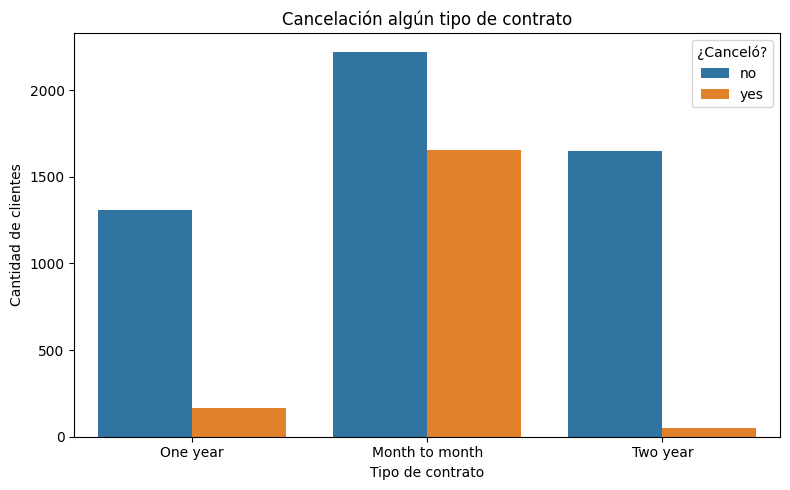

In [86]:
plt.figure(figsize=(8, 5))
sns.countplot(data=datos_original, x='contract', hue='churn')
plt.title('Cancelación algún tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad de clientes')
plt.legend(title='¿Canceló?')
plt.tight_layout()
plt.show()

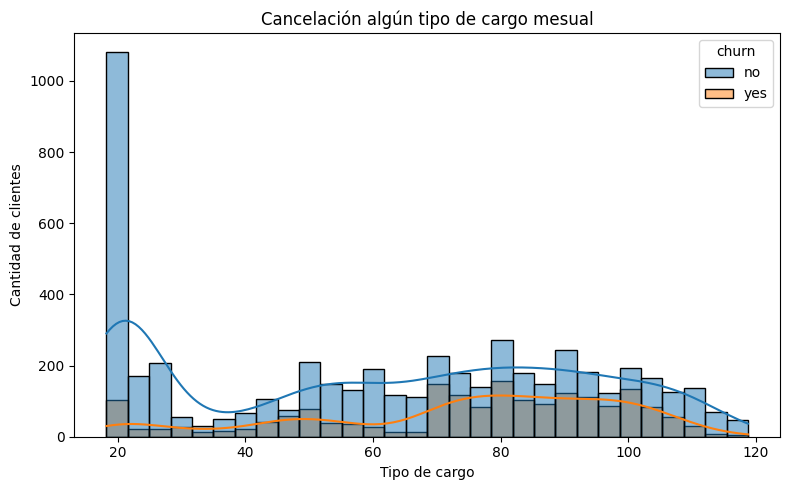

In [87]:
plt.figure(figsize=(8, 5))
sns.histplot(data=datos_original, x='charges_monthly', hue='churn', kde=True, bins=30)
plt.title('Cancelación algún tipo de cargo mesual')
plt.xlabel('Tipo de cargo')
plt.ylabel('Cantidad de clientes')
plt.tight_layout()
plt.show()

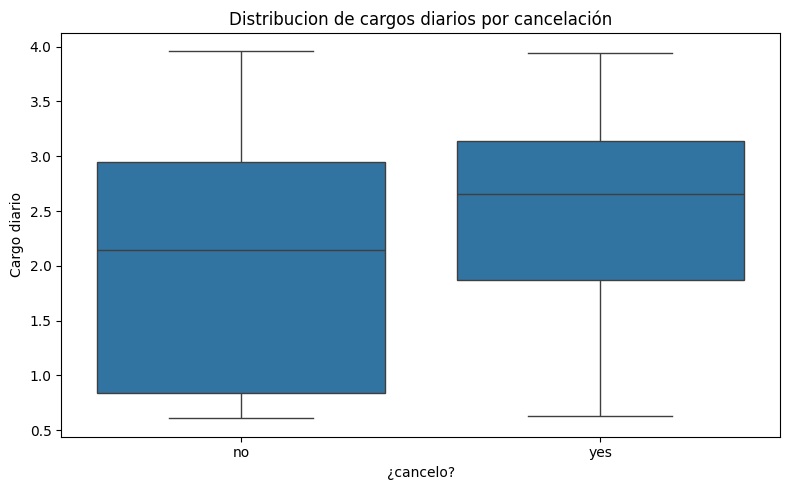

In [88]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=datos_original, x='churn', y='cuentas_diarias')
plt.title('Distribucion de cargos diarios por cancelación')
plt.xlabel('¿cancelo?')
plt.ylabel('Cargo diario')
plt.tight_layout()
plt.show()

# **Análisis Dirigido**

In [89]:
print(datos.columns)

Index(['gender_Female', 'gender_Male', 'phoneservice_No', 'phoneservice_Yes',
       'multiplelines_No', 'multiplelines_No_phone_service',
       'multiplelines_Yes', 'internetservice_DSL',
       'internetservice_Fiber_optic', 'internetservice_No',
       'contract_Month_to_month', 'contract_One_year', 'contract_Two_year',
       'churn', 'paymentmethod', 'charges_monthly', 'charges_total',
       'cuentas_diarias'],
      dtype='object')


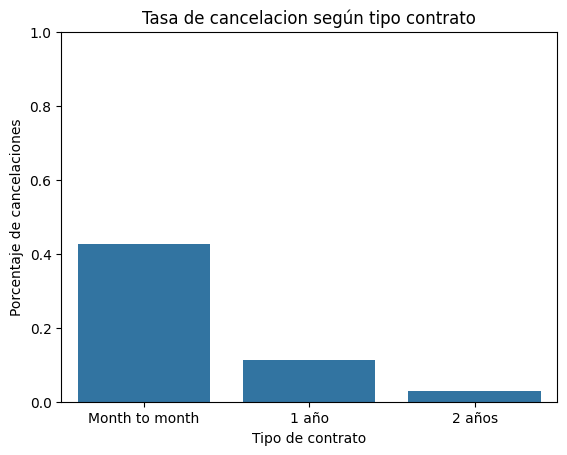

In [90]:
datos['churn'] = datos['churn'].apply(lambda x: 1 if x == 'yes' else 0)

contrato_churn = datos.groupby('contract_Month_to_month')['churn'].mean().reset_index()
contrato_churn['Tipo de contrato'] = 'Month to month'
contrato_churn = contrato_churn.rename(columns={'churn': 'Tasa de Cancelación'})

contrato_one_year_churn = datos.groupby('contract_One_year')['churn'].mean().reset_index()
contrato_one_year_churn['Tipo de contrato'] = '1 año'
contrato_one_year_churn = contrato_one_year_churn.rename(columns={'churn': 'Tasa de Cancelación'})

contrato_two_year_churn = datos.groupby('contract_Two_year')['churn'].mean().reset_index()
contrato_two_year_churn['Tipo de contrato'] = '2 años'
contrato_two_year_churn = contrato_two_year_churn.rename(columns={'churn': 'Tasa de Cancelación'})

contrado_df = pd.concat([contrato_churn[contrato_churn['contract_Month_to_month'] == 1],
                         contrato_one_year_churn[contrato_one_year_churn['contract_One_year'] == 1],
                         contrato_two_year_churn[contrato_two_year_churn['contract_Two_year'] == 1]])

sns.barplot(data=contrado_df, x='Tipo de contrato', y='Tasa de Cancelación')
plt.title("Tasa de cancelacion según tipo contrato")
plt.ylabel("Porcentaje de cancelaciones")
plt.ylim(0,1)
plt.show()

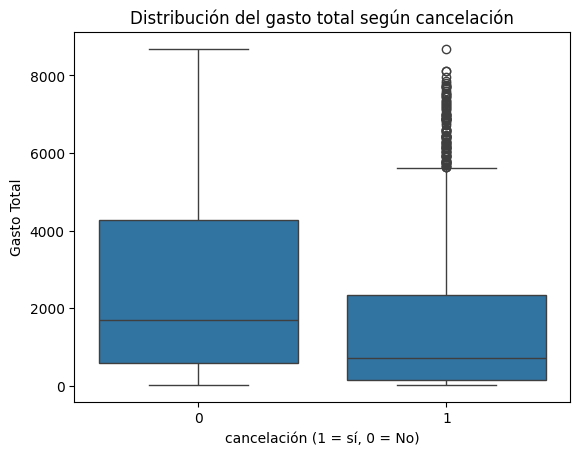

In [91]:
sns.boxplot(data=datos, x='churn', y='charges_total')
plt.title('Distribución del gasto total según cancelación')
plt.xlabel('cancelación (1 = sí, 0 = No)')
plt.ylabel('Gasto Total')
plt.show()

# **Separación de Datos**

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X = datos.drop("churn", axis=1)
y = datos["churn"]

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [95]:
print(f'Tamaño total: {len(datos)}')
print(f'Tamaño entrnsmiento: {len(X_train)}')
print(f'Tamaño prueba: {len(X_test)}')

Tamaño total: 7043
Tamaño entrnsmiento: 5634
Tamaño prueba: 1409


# **Creación de Modelos**

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

for col in X.columns:
  X[col] = pd.to_numeric(X[col], errors='coerce')

X.dropna(axis=1, how='all', inplace=True)

for col in X.columns:
  X[col].fillna(X[col].median(), inplace=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("NaNs in X_train_scaled:", np.isnan(X_train_scaled).sum())
print("NaNs in X_test_scaled:", np.isnan(X_test_scaled).sum())


log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)

print("Regresión Logística")
print(classification_report(y_test, y_pred_log))

/tmp/ipython-input-96-3620226000.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].median(), inplace=True)


NaNs in X_train_scaled: 0
NaNs in X_test_scaled: 0
Regresión Logística
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1562
           1       0.64      0.51      0.57       551

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

print("Árbol de Desición")
print(classification_report(y_test, y_pred_tree))

Árbol de Desición
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1562
           1       0.48      0.50      0.49       551

    accuracy                           0.73      2113
   macro avg       0.65      0.65      0.65      2113
weighted avg       0.73      0.73      0.73      2113



## **Regresión logística**

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

=== Regresión Logística ===
Exactitud: 0.80
Precisión: 0.64
Recall: 0.51
F1-score: 0.57


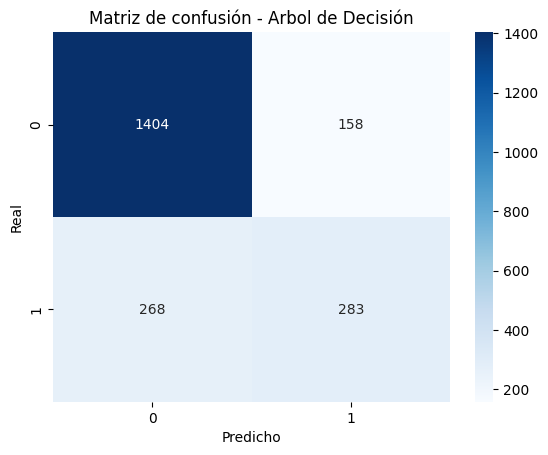

In [99]:
acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
rec_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)
cm_log = confusion_matrix(y_test, y_pred_log)

print("=== Regresión Logística ===")
print(f'Exactitud: {acc_log:.2f}')
print(f'Precisión: {prec_log:.2f}')
print(f'Recall: {rec_log:.2f}')
print(f'F1-score: {f1_log:.2f}')


sns.heatmap(cm_log, annot = True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión - Arbol de Decisión")
plt.xlabel('Predicho')
plt,plt.ylabel('Real')
plt.show()

## **Ábol de Decisión**

=== Árbol de Decisión ===
Exactitud: 0.73
Precisión: 0.48
Recall: 0.50
F1-score: 0.49


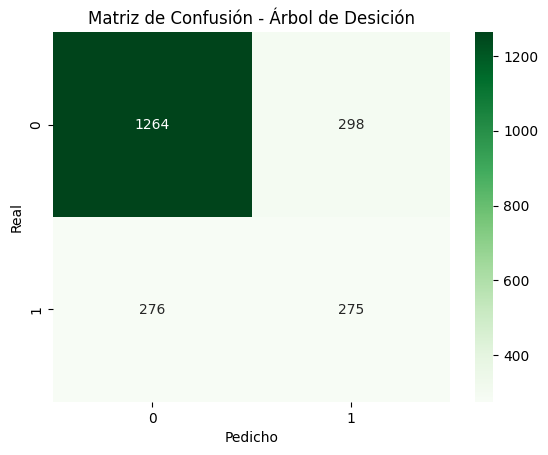

In [100]:
acc_tree = accuracy_score(y_test, y_pred_tree)
prec_tree = precision_score(y_test, y_pred_tree)
rec_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
cm_tree = confusion_matrix(y_test, y_pred_tree)

print('=== Árbol de Decisión ===')
print(f'Exactitud: {acc_tree:.2f}')
print(f'Precisión: {prec_tree:.2f}')
print(f'Recall: {rec_tree:.2f}')
print(f'F1-score: {f1_tree:.2f}')

sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Greens")
plt.title("Matriz de Confusión - Árbol de Desición")
plt.xlabel("Pedicho")
plt.ylabel("Real")
plt.show()

# **Análisis de la Importancia de las Variables**

In [101]:
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': log_model.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

print("Importancia de variables - Regresión Logística")
print(coeficientes)

Importancia de variables - Regresión Logística
                          Variable  Coeficiente
10         contract_Month_to_month     0.476124
8      internetservice_Fiber_optic     0.329254
15                 cuentas_diarias     0.268366
13                 charges_monthly     0.268366
2                  phoneservice_No     0.061719
5   multiplelines_No_phone_service     0.061719
6                multiplelines_Yes     0.058400
0                    gender_Female     0.011542
1                      gender_Male    -0.011542
11               contract_One_year    -0.037695
3                 phoneservice_Yes    -0.061719
4                 multiplelines_No    -0.094612
7              internetservice_DSL    -0.115609
9               internetservice_No    -0.266157
12               contract_Two_year    -0.519007
14                   charges_total    -0.821086


In [102]:
importances = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': tree_model.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("Importancia de variables - Árbol de Decisión")
print(importances)

Importancia de variables - Árbol de Decisión
                          Variable  Importancia
14                   charges_total     0.347730
15                 cuentas_diarias     0.182997
10         contract_Month_to_month     0.172295
13                 charges_monthly     0.164205
8      internetservice_Fiber_optic     0.047248
0                    gender_Female     0.021294
1                      gender_Male     0.019651
9               internetservice_No     0.014831
4                 multiplelines_No     0.013075
12               contract_Two_year     0.006768
6                multiplelines_Yes     0.004260
5   multiplelines_No_phone_service     0.002842
7              internetservice_DSL     0.001927
2                  phoneservice_No     0.000874
3                 phoneservice_Yes     0.000000
11               contract_One_year     0.000000


/tmp/ipython-input-104-1451661247.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=importances, palette='Greens_d')


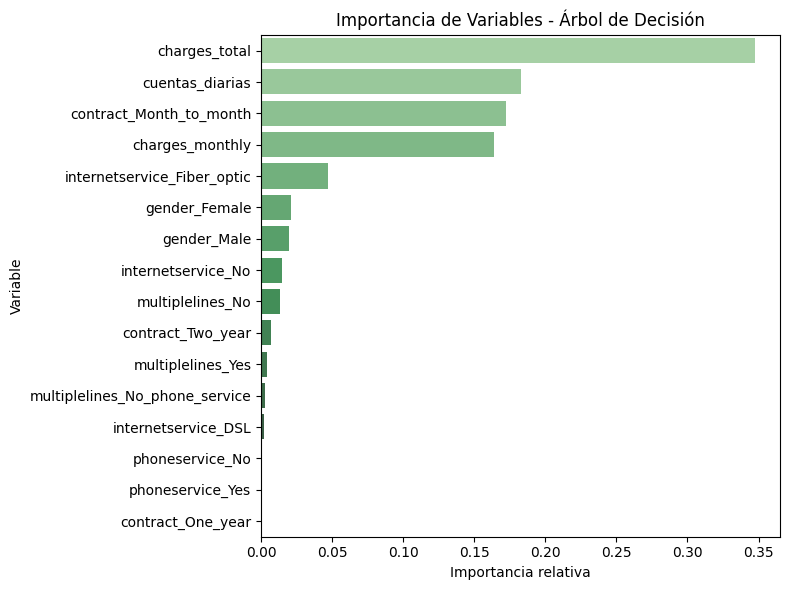

In [104]:
plt.figure(figsize=(8,6))
sns.barplot(x='Importancia', y='Variable', data=importances, palette='Greens_d')
plt.title('Importancia de Variables - Árbol de Decisión')
plt.xlabel('Importancia relativa')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

In [106]:
datos.to_csv("para_reporte_final.csv", index=False)

# **Conclusión**

# **Informe de cancelacón de clientes**

## **1- Resumen ejecutivo**

Se analizó un conjunto de datos para determinar que factores influyen en la cancelación de clientes. Utilizando Machine learningm se evaluó el impacto de varibales seleccionadas y se desarrollaron estrategias de retención basadas en los resultados.


2- Evaluacion de modelos



```
# Regresión Logística
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1562
           1       0.64      0.51      0.57       551

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113

```



```
# Árbol de Desición
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1562
           1       0.48      0.50      0.49       551

    accuracy                           0.73      2113
   macro avg       0.65      0.65      0.65      2113
weighted avg       0.73      0.73      0.73      2113
```
El modelo de Regresión logistica ofrece mejor desempeño en general y balance entre precisión y recall en comparación con el arbol de Decisión. Sin embargo, el recall para la clase 1, aún es bajo , lo cual limita su efectividad para prevenir cancelaciones.


## **3-Analisis de Variables Relevantes**



```
# Importancia de variables - Árbol de Decisión
                          Variable  Importancia
14                   charges_total     0.347730
15                 cuentas_diarias     0.182997
10         contract_Month_to_month     0.172295
13                 charges_monthly     0.164205
8      internetservice_Fiber_optic     0.047248
0                    gender_Female     0.021294
1                      gender_Male     0.019651
9               internetservice_No     0.014831
4                 multiplelines_No     0.013075
12               contract_Two_year     0.006768
6                multiplelines_Yes     0.004260
5   multiplelines_No_phone_service     0.002842
7              internetservice_DSL     0.001927
2                  phoneservice_No     0.000874
3                 phoneservice_Yes     0.000000
11               contract_One_year     0.000000
```

Interpretación: Las personas con altos montos acumulados y frecuentes interacciones con el sistema de cuentas diariaspresentan una mayor cancelación, asi mismo los clientes con contratos mes a mes muestran una clara coorelación con la baja fidelización, puede que el cliente perciva que no esta recibiendo por lo que esta pagando.

## **4-Estrategias de retención propuestas**

### **1-Clientes con contratos mensuales**
-Ofrecer descuentos o beneficios por cambiar a contratos anuales

-Enviar campañas personalizadas con beneficios exclusivos por fidelidad

### **2-Clientes con muchas cuentas diarias**
-Activar seguimiento proactivo a clientes con muchas cuentas diarias.
-Dar atencion con equipo de retención premium.

### **3-Por charges total**
-Crear programa de fidelización para antiguos clientes.

-Ofrecer servicios retroactivos (mes gratis, mejoras gratis).

### **4-Cargos mensuales**
-Personalzar planes según uso real.
-Ofrecer "planes inteligentes" con IA promociones adaptativas



## **Conclusión**

Basado en los datos recopilados se identifico que las variables que mas influyen en la cancelación de los clientes en el servicio de telecom X. las cuatro variables mas determinantes son:

**charges_total**: El total acumulado por el cliente.

**cuentas_diarias**: La frecuencia de contacto con soporte o cuentas diarias

**contract_Month_to month**: clientes con contrato mes a mes.

**charges_monthly**: El monto mensual que paga el cliente


Estas variables muetran que los clientes con este patron de comportamiento, clientes con cargos más altos (mesuales o acumulados), contacto frecuente con sopórte y contratos flexibles presentan una mayor probabilidad de cancelación